В этом задании необходимо использовать набор данных ad.csv.

1) Датасет содежит 2 столбца: объявление (A/B) и действие (0/1).

2) Вам необходимо сформулировать гипотезу, провести ее проверку (пользуясь классическим подходом) и ответить на вопрос какое из объявлений лучше.

## **1. Описание задачи**

Издательство планирует перевыпуск книги "Детские сказки" в новой редакции с картинками, напечатан пробный тираж. Перед маркетоголом стоит задача подтвердить или опровергнуть повышенный спрос на данную продукцию. Для этого в магазине были представлены два варианта издания: a) старый без картинок; b) новый с картинками. Вариант b будет признан успешным в случае повышения конверсии в покупку на 10 %.  

## **2. Описание гипотез**

Для проверки успешности используем двусторонний тест.

Нулевая гипотеза H0 - оба варианта изданий продаются с одинаковой конверсией, добавление картинок не повлияло на продажи:


Н0 : CR_a = CR_b

Альтернативная гипотеза H1 - варианты изданий продаются с разной конверсией:


H1 : CR_a ≠ CR_b

где CR_a и CR_b - конверсия в покупку старого и нового варианта издания.

Доверительный критерий принимаем равным 99%, тогда уровень значимости α = 0.01.

Если полученное значение p-value окажется меньше α, то мы отвергаем нулевую гипотезу H0 и рассматриваем альтернативную H1.


## **3. Описание исходных данных**

*Выбираем две группы:*

Группа A - контрольная группа, соответ. старому варианту издания;

Группа B - тестовая группа, соответ. новому варианту издания. 

*Совершаемое действие:*

0 - покупка не совершена;

1 - покупка совершена.




## **4. Анализ исходных данных**

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

## Запрашиваем таблицу результатов тестирования

df_books=pd.read_csv('/content/ad.csv')
df_books

,ad_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1
...,...,...
1995,A,0
1996,A,0
1997,A,0
1998,A,1


Всего 2000 записей:


ad_id - идентификатор группы


action - совершаемое действие

In [15]:
## Запрашиваем таблицу результатов тестирования

df_books2=pd.crosstab(df_books['ad_id'], df_books['action'])
df_books2=df_books2.assign(count = df_books2.sum(axis=1))
df_books2.columns = ['no_buy', 'yes_buy', 'total'] 
df_books2


,no_buy,yes_buy,total
ad_id,,,
A,696,304,1000
B,628,372,1000


Подтверждаем: 

наличие данных 2х групп A и B;

совершаемое действие имеет значения только 0 или 1;

в каждой из групп по 1000 действий.

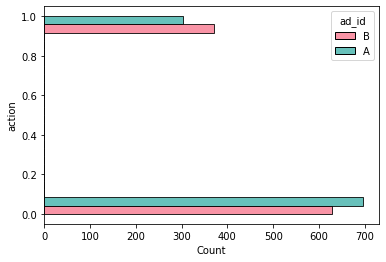

In [16]:
## Визуализируем таблицу результатов тестирования

sns.histplot(data=df_books, y="action", hue="ad_id", multiple="dodge", palette = "husl")

Предварительный вывод:
По данным графика видно, что в группе В, людей совершивших покупку, больше и следовательно конверсия лучше.

## **5. Анализ статистических данных**

In [17]:
## Для расчета статистических данных группируем таблицу по идентификатору группы (an_id), агрегацию проводим по столбцу action. 
df_books3=df_books.groupby('ad_id')['action']

## Задаем функции стандартного отклонения и ошибки через анонимную функцию lambda.
std_p = lambda x: np.std(x, ddof=0)
se_p = lambda x: stats.sem(x, ddof=0)

## Проводим расчет конверсии (среднего), стандартного отклонения и ошибки.
df_books3 = df_books3.agg([np.mean, std_p, se_p]) 
df_books3.columns = ['conversion', 'std_deviation', 'std_error'] 

## Объединяем исходные и полученные стат. данные: 
df_books2 = df_books2.assign(conversion=df_books3['conversion'],std_deviation=df_books3['std_deviation'],std_error=df_books3['std_error'])
df_books2


,no_buy,yes_buy,total,conversion,std_deviation,std_error
ad_id,,,,,,
A,696,304,1000,0.304,0.459983,0.014546
B,628,372,1000,0.372,0.483338,0.015285


Предварительный вывод: Полученные результаты показывают, что новое издание книги с картинками работает немного лучше. Конверсия составляет 37,2 % против 30,4 %.

## **6. Визуализация конверсии**

Text(0, 0.5, 'Конверсия')

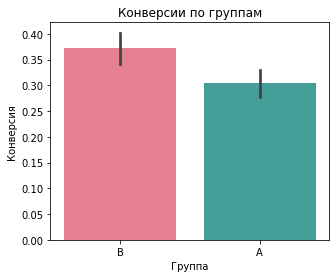

In [18]:
plt.figure(figsize=(5,4)) 

sns.barplot(x=df_books['ad_id'], y=df_books['action'], palette = "husl") 

plt.title( 'Конверсии по группам') 
plt.xlabel('Группа') 
plt.ylabel('Конверсия')

## **7. Проверка гипотез.**

In [19]:
## Анализируемые данные принимают только два значения 0 и 1, поэтому используем критерий Z-статистики для получения значения p_value

from statsmodels.stats.proportion import proportions_ztest, proportion_confint

## В качестве count указываем общее количество совершивших покупку по группам, в качестве nobs общее кол-во выборки
z_stat, p_value = proportions_ztest(df_books2['yes_buy'], df_books2['total'])

print('Значение z-statistic:', z_stat)
print('Значение p-value:', p_value)

Значение z-statistic: -3.2144492244084213
Значение p-value: 0.0013069502732125403


In [20]:
## Проверяем нулевую гипотезу. Сравниваем p-value c нашим уровнем значимости α.
alpha = 0.01
print(p_value < alpha)

True


Промежуточный вывод: Значение p-value меньше порога ошибки первого рода — результат теста является статзначимым

## **8. Расчет доверительного интервала**

In [21]:
## Проводим расчет доверительных интервалов конверсий по группам с учетом уровня значимости α. 
(CR_a_low, CR_b_low), (CR_a_up, CR_b_up) = proportion_confint(df_books2['yes_buy'], df_books2['total'], alpha=alpha)

print('Доверительный интервал для контрольной группы A:', CR_a_low, ' - ', CR_a_up)
print('Доверительный интервал для тестовой группы B:', CR_b_low, ' - ', CR_b_up)

Доверительный интервал для контрольной группы A: 0.26653217430340437  -  0.3414678256965956
Доверительный интервал для тестовой группы B: 0.3326297319752053  -  0.4113702680247947


In [22]:
## Проверяем наше исходное условие успешности - рост конверсии на 10% (CR_diff). 
## Сверяем с разницей между максимальным порогом конверсии тестовой группы (41,1%) и базовым значением контрольной (30,4%). 

CR_diff = 0.1

print ((CR_b_up-df_books2['conversion']['A'])>=CR_diff)

True


Итоговый вывод: Диапaзон доверительного интервала для тестовой группы составляет от 33% до 41%. Этот интервал не включает в себя базовую конверсию 30,4%. Но включает целевое значение к которому мы стремились 40% (10% роста). Новое издание продается успешнее чем старое. 